In [4]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.551


In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

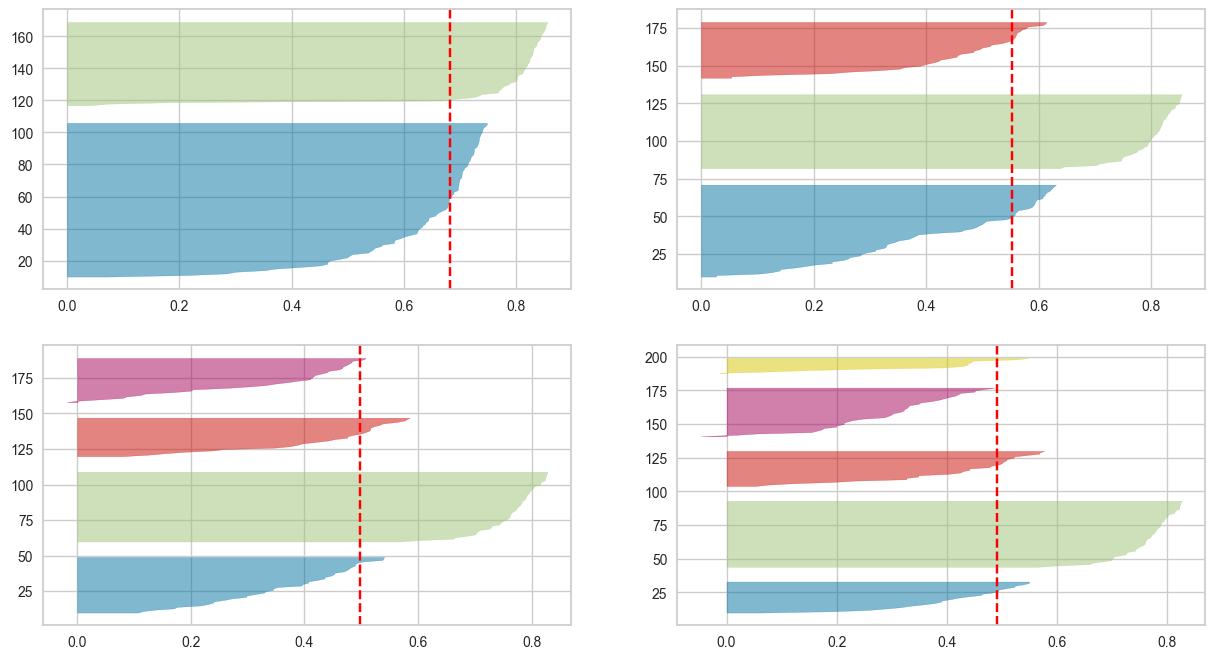

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(
        n_clusters=i, 
        init='k-means++', 
        n_init=10, 
        max_iter=100, 
        random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

plt.savefig(f'out/silhouette_visualizer_clusters.png', bbox_inches='tight')
plt.show()

In [11]:
import numpy as np
import imageio

In [28]:
k = 3
np.random.seed(0)
centroids_indices = np.random.choice(range(len(X)), k, replace=False)
centroids = X[centroids_indices]

def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


def update_centroids(X, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)


max_iter = 100
images = []
for iteration in range(max_iter):
    clusters = assign_clusters(X, centroids)
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for i in range(k):
        cluster_points = X[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Кластер {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Центроиды')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(f'K-means Clustering - Итерация {iteration + 1}')
    plt.legend()

    plt.savefig(f'out/iteration_{iteration}.png')
    plt.close()
    images.append(imageio.imread_v2(f'out/iteration_{iteration}.png'))

    new_centroids = update_centroids(X, clusters, k)
    if np.all(centroids == new_centroids):
        print("Алгоритм сходится на шаге", iteration + 1)
        break

    centroids = new_centroids

imageio.mimsave('kmeans_animation.gif', images, fps=1)

Алгоритм сходится на шаге 9
